## Minimal example for using AutoScatter

This notebook serves as a proof of concept and explains how to use AutoScatter for the simple example of a circulator.

An isolator is a three-port device in which the signal entering one of the ports is scattered exclusively to the next port in a clockwise (anticlockwise) direction with unity transmission. A circulator has the scattering matrix:

$S_\mathrm{target}=\begin{pmatrix}0&0&1\\ 1&0&0\\ 0&1&0 \end{pmatrix}$

When replacing one of the port modes with an auxiliary mode, the same solutions discovered below resemble the isolator discussed in the notebook 1\_isolator.ipynb.

When ignoring the scattering from and to one of the ports, the scattering between 
For further details, checkout our [GitHub](https://github.com/jlandgr/autoscatter) and [arxiv:2404.14887](https://arxiv.org/abs/2404.14887).

In [2]:
# In case you are using Google Colab, this cell will install you AutoScatter
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install git+https://github.com/jlandgr/autoscatter.git

In [3]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import autoscatter.architecture_optimizer as arch_opt
import autoscatter.constraints as msc
import autoscatter.symbolic as sym

In [4]:
S_target = sp.Matrix([[0,0,1],[1,0,0],[0,1,0]])
print('target scattering matrix of a circulator:')
sym.render(S_target)
optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0,
)
irreducible_graphs = optimizer.perform_depth_first_search()

target scattering matrix of a circulator:


<IPython.core.display.Math object>

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 248551.35it/s]


216 graphs identified
start depth-first search
test all graphs with 9 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


test all graphs with 8 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 79.27it/s]


test all graphs with 7 degrees of freedom:


100%|██████████| 15/15 [00:00<00:00, 30.17it/s]


test all graphs with 6 degrees of freedom:


100%|██████████| 10/10 [00:00<00:00, 45.68it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 0 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


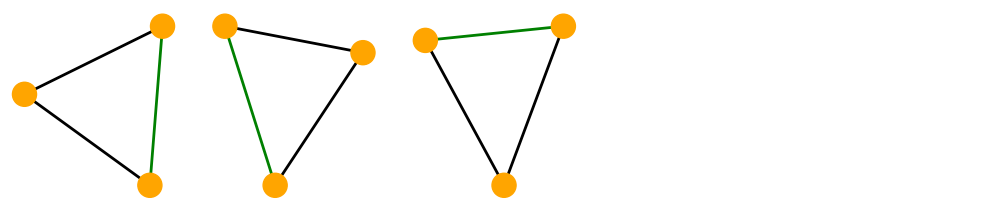

In [5]:
node_colors = ['orange', 'orange', 'orange'] # the port modes are orange, there is no auxiliary mode
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)